In [1]:
# Sentiment analysis for articles

In [2]:
from sentita import calculate_polarity
import numpy as np
from tqdm import tqdm
import pandas as pd

In [3]:
dataset_root = 'data/'
nonpreprocessed_articles = pd.read_csv(dataset_root + 'articles.csv', sep = ';', index_col = [0])
nonpreprocessed_articles

,title,content,date,author,region,zone
0,D’Alberto alla riunione delle ANCI regionali c...,TERAMO – Il Presidente Gianguido D’Alberto ha ...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,"Coronavirus, le novità introdotte dal DPCM 10 ...",Sul sito del Ministero dell’Interno è stata pu...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,"Coronavirus, nuove misure per vendita generi a...","PESCARA – Oggi, mercoledì 15 aprile, il Presid...",2020-04-15,Abruzzonews,Abruzzo,Centre
3,"Regione, ecco la guida per la formazione a dis...",PESCARA – Una vera e propria guida operativa i...,2020-04-15,Abruzzonews,Abruzzo,Centre
4,Ministro Amendola e Oddati all’iniziativa Pd A...,REGIONE – “Le scelte del Pd. Per l’Italia e pe...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24579,"Copie pirata di giornali su Telegram, salgono ...",È salito a 114 il numero dei canali Telegram s...,2020-05-04,La Repubblica,Lazio,Centre
24580,"Inchiesta sulla sanità umbra, chiuse le indagi...",La chiusura dell'indagine sulle assunzioni in ...,2020-05-04,La Repubblica,Lazio,Centre
24581,"Coronavirus in Italia, 3691 denunciati nel pri...",ROMA - Chi si aspettava un boom di sanzioni ne...,2020-05-05,La Repubblica,Lazio,Centre
24582,"Coronavirus, Medicina, la denuncia di Azione: ...",Ventiduemila medici sono pronti a entrare in s...,2020-05-06,La Repubblica,Lazio,Centre


In [4]:
cols = ['article_id', 'positive_avg', 'negative_avg', 'positive_max', 'negative_min', 'polarities_content_splits']
polarity_dataframe = pd.DataFrame()

articles_index = nonpreprocessed_articles.index
for i in tqdm(articles_index):
    _, test_pol = calculate_polarity(nonpreprocessed_articles.loc[i, 'content'].split('.'))
    
    positive_polarities = [x[0] for x in test_pol]
    negative_polarities = [x[1] for x in test_pol]
    
    positive_avg = np.mean(positive_polarities)
    negative_avg = np.mean(negative_polarities)
    
    positive_max = max(positive_polarities)
    negative_min = min(negative_polarities)

    
    score = [i, positive_avg, negative_avg, positive_max, negative_min, test_pol]  # (index, positive average polarity, negative average polarity, max pos pol , min neg pol)
    
    polarity_dataframe = polarity_dataframe.append(pd.DataFrame([score], columns = cols))
    
    #if len(polarity_dataframe.index) % 10 == 0:
        #polarity_dataframe.to_csv(dataset_root + 'article_polarities.csv', sep = ';', na_rep = 'nan')    



100%|██████████| 24584/24584 [3:59:15<00:00,  1.71it/s]  


In [5]:
polarity_dataframe = polarity_dataframe.reset_index(drop = True)
#polarity_dataframe.to_csv(dataset_root + 'article_polarities.csv', sep = ';', na_rep = 'nan')
polarity_dataframe

,article_id,positive_avg,negative_avg,positive_max,negative_min,polarities_content_splits
0,0,0.046155,0.044203,0.584534,0.000009,"[[0.00092852116, 0.0005393326], [0.00010349075..."
1,1,0.133937,0.076886,0.584534,0.000006,"[[8.377696e-06, 1.613107e-05], [4.9787727e-06,..."
2,2,0.171993,0.065472,0.630472,0.000009,"[[2.8751943e-05, 1.2847595e-05], [8.00114e-06,..."
3,3,0.065227,0.026881,0.584534,0.000010,"[[5.6668465e-05, 4.3567474e-05], [8.147673e-06..."
4,4,0.196379,0.138541,0.615877,0.000013,"[[0.006206006, 0.0057546496], [9.530106e-05, 7..."
...,...,...,...,...,...,...
24579,24579,0.001350,0.004847,0.006938,0.000012,"[[5.957129e-06, 1.2265669e-05], [9.896326e-06,..."
24580,24580,0.000034,0.000049,0.000168,0.000007,"[[0.0001681745, 0.00012552738], [5.7433404e-06..."
24581,24581,0.151941,0.170270,0.617739,0.000081,"[[1.6639458e-05, 8.127809e-05], [0.6177395, 0...."
24582,24582,0.022013,0.066938,0.096909,0.000012,"[[0.00041374564, 0.0017509758], [0.0046955347,..."


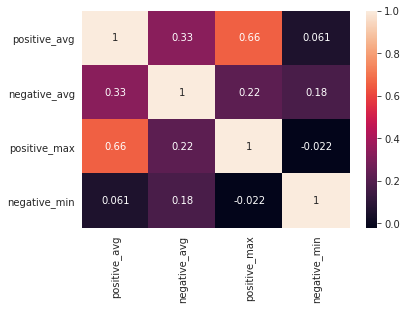

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
ax = sns.heatmap(polarity_dataframe.iloc[:,1:].corr().values,
                 annot = True,
                 xticklabels=cols[1:5],
                 yticklabels=cols[1:5])

plt.xticks(rotation = 90)
plt.show()

In [58]:
average_pos_value = polarity_dataframe.positive_avg.mean()
average_neg_value = polarity_dataframe.negative_avg.mean()

print('Average positive value is', average_pos_value)
print('Average negative value is', average_neg_value)

Average positive value is 0.13483428824480007
Average negative value is 0.10872665876878458


In [ ]:
iterations = []
number_pos_articles = []
number_neg_articles = []

a = 0.01
interval = [(x/(a + x)) for x in np.linspace(0, 1, 5000)]

for index, num in zip(range(len(interval)), interval):
    iterations.append(num)
    
    number_pos_articles.append(len(polarity_dataframe[polarity_dataframe.positive_avg > num].index))
    number_neg_articles.append(len(polarity_dataframe[polarity_dataframe.negative_avg < 1 - num].index))
    

sns.lineplot(iterations, number_pos_articles)
plt.title('Number of positive polarity articles')
plt.xlabel('Polarity threshold')
plt.ylabel('Number of articles')
plt.show()


sns.lineplot(iterations, number_neg_articles, color = 'C1')
plt.title('Number of negative polarity articles')
plt.xlabel('Polarity threshold')
plt.ylabel('Number of articles')
plt.show()

